In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification, make_blobs, make_circles
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, log_loss
from sklearn.model_selection import train_test_split

In [180]:
from tqdm import tqdm

# RÉSEAU DE NEURONES PROFOND

dimensions de X: (2, 100)
dimensions de y: (1, 100)


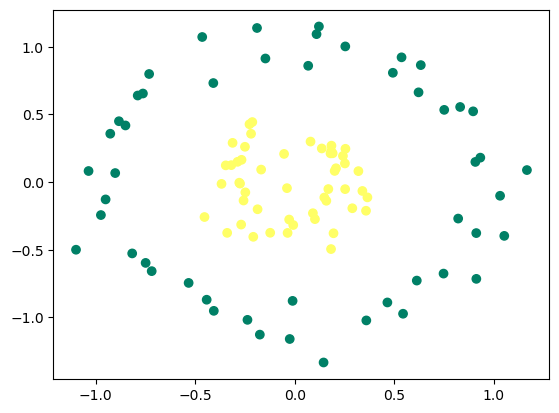

In [181]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [132]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)
    
    np.random.seed(1)
    
    # creation des couches intermédiaires
    for couche in range(1, C):
        parametres[f'W{couche}'] = np.random.randn(dimensions[couche], dimensions[couche-1])
        parametres[f'b{couche}'] = np.random.randn(dimensions[couche], 1)    
    
    return parametres

In [133]:
parametres = initialisation(dimensions=[2,3,3,1])

for cle, valeur in parametres.items():
    print(cle, valeur.shape)

W1 (3, 2)
b1 (3, 1)
W2 (3, 3)
b2 (3, 1)
W3 (1, 3)
b3 (1, 1)


In [134]:
parametres

{'W1': array([[ 1.62434536, -0.61175641],
        [-0.52817175, -1.07296862],
        [ 0.86540763, -2.3015387 ]]),
 'b1': array([[ 1.74481176],
        [-0.7612069 ],
        [ 0.3190391 ]]),
 'W2': array([[-0.24937038,  1.46210794, -2.06014071],
        [-0.3224172 , -0.38405435,  1.13376944],
        [-1.09989127, -0.17242821, -0.87785842]]),
 'b2': array([[ 0.04221375],
        [ 0.58281521],
        [-1.10061918]]),
 'W3': array([[1.14472371, 0.90159072, 0.50249434]]),
 'b3': array([[0.90085595]])}

In [135]:
def forward_propagation(X, parametres):
    
    # declaration dictionnaire activations
    activations = {'A0' : X}
    
    C = len(parametres)//2
    
    for couche in range(1, C+1):
        
        Z = parametres[f"W{couche}"].dot(activations[f"A{couche-1}"]) + parametres[f"b{couche}"]
        A = 1 / (1 + np.exp(-Z))
        
        activations[f'A{couche}'] = A
    
    return activations

In [136]:
activations = forward_propagation(X, parametres)

In [137]:
for cle, valeur in activations.items():
    print(cle, valeur.shape)

A0 (2, 100)
A1 (3, 100)
A2 (3, 100)
A3 (1, 100)


In [138]:
activations

{'A0': array([[-0.94957536,  0.09138459,  0.93214973,  0.20734231, -0.36750218,
          0.2532073 , -0.40867925, -0.27450909,  0.24224991,  0.158872  ,
          0.17984262,  0.19490678, -0.18640787,  0.12157863,  0.49287043,
         -0.81607272, -0.88256159, -0.90136274, -0.44207091,  0.63318667,
          0.74738819,  0.07947606,  0.83076047, -0.28699936,  0.91209859,
          1.05235514,  0.62194713,  0.35809164, -0.03880452, -0.16849662,
          0.18452538, -0.33911143,  0.10167817, -0.24980872,  0.3198604 ,
         -0.97315797, -0.73097704,  0.25473331, -0.21290872, -0.27834832,
          1.16614005,  0.19060984,  0.54409779,  0.35966887,  0.89607094,
         -0.1892848 , -0.46440441,  0.46542725, -0.02494581,  0.75084969,
         -0.02786858, -0.05339409,  0.90718408, -0.40622936, -0.74854102,
          0.36512093,  0.10964665, -0.17507169, -0.92614192,  0.25215638,
          0.2540514 , -0.71813367, -0.21920932,  0.20066063, -0.45295043,
         -0.26890899, -0.5326257

In [139]:
def back_propagation(parametres, activations, y):
    
    m = y.shape[1]
    
    C = len(parametres) // 2
    
    gradients = {}
    
    # dZ = A - y ou A est la derniere activation dans ce cas 
    dZ = activations[f'A{C}'] - y
    
    for couche in range(C, 0, -1):
        
        # activation couche inférieur
        A = activations[f'A{couche-1}']
        # paramètre couche en cours
        W = parametres[f"W{couche}"]
        
        # gradient couche en cours
        dW = (1/m) * np.dot(dZ, A.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        
        gradients[f'dW{couche}'] = dW
        gradients[f'db{couche}'] = db
        
        # dZ couche inférieur
        dZ = np.dot(W.T, dZ) * A * (1-A)
    
    return gradients

In [140]:
gradients = back_propagation(parametres, activations, y)

In [141]:
for cle, valeur in gradients.items():
    print(cle, valeur.shape)

dW3 (1, 3)
db3 (1, 1)
dW2 (3, 3)
db2 (3, 1)
dW1 (3, 2)
db1 (3, 1)


In [142]:
def update(gradients, parametres, learning_rate):
    
    C = len(parametres) // 2
    
    for couche in range(1, C+1):
        
        parametres[f"W{couche}"] = parametres[f"W{couche}"] - learning_rate * gradients[f'dW{couche}']
        parametres[f"b{couche}"] = parametres[f"b{couche}"] - learning_rate * gradients[f'db{couche}']
    
    return parametres

In [150]:
def predict(X, parametres):
    
    C = len(parametres) // 2
    
    activations = forward_propagation(X, parametres)
    Af = activations[f'A{C}']
    
    return Af >= 0.5

In [151]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):

    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)
    
    C = len(parametres) // 2
    
    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)):
        
        activations = forward_propagation(X, parametres)
        gradients = back_propagation(parametres, activations, y)
        parametres = update(gradients, parametres, learning_rate)
    
        Af = activations[f"A{C}"]
        
        if i %10 == 0:
            # Train
            train_loss.append(log_loss(y.flatten(), Af.flatten()))
            y_pred = predict(X, parametres)
            train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))



    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    

    return parametres

In [155]:
def evaluation(X, y, parametres):
    # y_pred du jeu de test avec les paramètres finaux
    y_pred = predict(X, parametres)
    
    # accuracy score et matrice de confusion
    accuracy_test = accuracy_score(y.T, y_pred.T)
    
    # crosstab
    crosstab = pd.crosstab(y, y_pred.astype('int'))
    crosstab.index = ['test 0', 'test 1']
    crosstab.columns = ['pred 0', 'pred 1']
    crosstab = crosstab.T
    
    print(f"L'accuracy sur le jeu de test est de {accuracy_test}")
    return crosstab

## Test avec un cercle

dimensions de X: (2, 100)
dimensions de y: (1, 100)


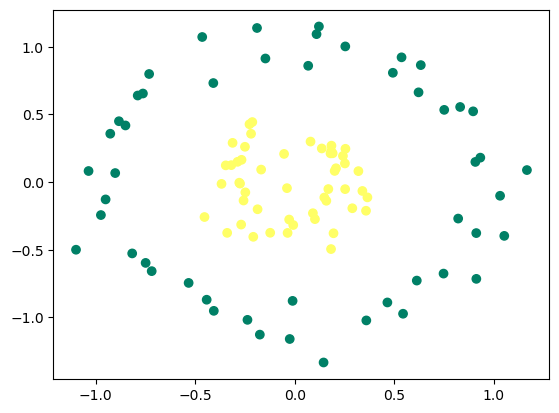

In [158]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [159]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

100%|████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2184.53it/s]


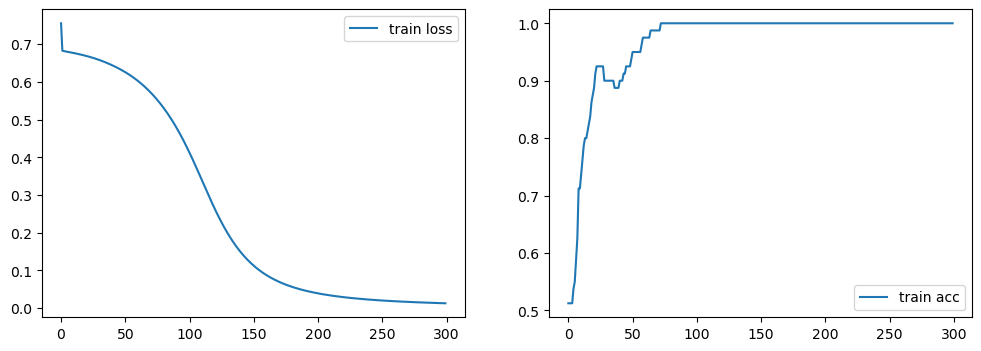

In [160]:
parametres = deep_neural_network(X=X_train, y=y_train, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)

In [161]:
y_pred = predict(X_test, parametres)
y_pred

array([[False, False,  True, False,  True, False, False,  True,  True,
         True, False,  True, False, False,  True,  True,  True, False,
         True,  True]])

In [162]:
evaluation(X_test, y_test, parametres)

L'accuracy sur le jeu de test est de 1.0


,test 0,test 1
pred 0,9,0
pred 1,0,11


## Test sur les photos de chiens et chats

In [163]:
import h5py
import utilities

In [164]:
X_train, y_train, X_test, y_test = utilities.load_data()

In [165]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


In [166]:
# standardisation entre 0 et 1
X_train_scaler = X_train/255
X_test_scaler = X_test/255

# vectorisation des images
X_train_scaler = X_train_scaler.reshape(X_train_scaler.shape[0], X_train_scaler.shape[1]*X_train_scaler.shape[2])
X_test_scaler = X_test_scaler.reshape(X_test_scaler.shape[0], X_test_scaler.shape[1]*X_test_scaler.shape[2])

# transposition des matrices
X_train_scaler = X_train_scaler.T
X_test_scaler = X_test_scaler.T
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

In [167]:
print(X_train_scaler.shape)
print(y_train.shape)
print(X_test_scaler.shape)
print(y_test.shape)

(4096, 1000)
(1, 1000)
(4096, 200)
(1, 200)


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [09:30<00:00,  5.26it/s]


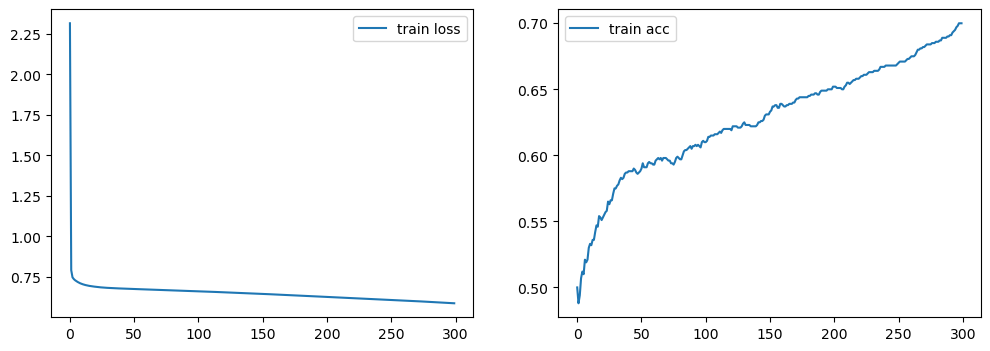

In [176]:
parametres = deep_neural_network(X=X_train_scaler, y=y_train, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)

In [170]:
evaluation(X_test_scaler, y_test, parametres)

L'accuracy sur le jeu de test est de 0.505


,test 0,test 1
pred 0,57,56
pred 1,43,44
